
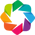

In [30]:
import pandas as pd
import numpy as np
import holoviews as hv

hv.extension('bokeh')

In [4]:
grid_data = pd.read_csv('../04_krig/kt3d_clipped.out', header=None, skiprows=5, delim_whitespace=True)

grid_data.columns=['nscore_estimate','kriging_variance','backtr_estimate']

grid_data.replace(-999, np.nan,inplace=True)

grid_data.describe()

In [91]:
grid_data_reshape = np.flip(grid_data.backtr_estimate.values.reshape((20,100,120)),axis=1)

ds = hv.Dataset((np.arange(120), np.arange(100), np.arange(20),   grid_data_reshape),['x','y','z_slice_no'], 'kriged_value')

In [125]:
%%opts Image (cmap='gist_earth' ) [width=600 height=600 colorbar=True colorbar_position='left']
ds.to(hv.Image, ['x','y'])

:HoloMap   [z_slice_no]
   :Image   [x,y]   (kriged_value)